In [2]:
import warnings
import itertools
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
plt.style.use('fivethirtyeight')

In [3]:
dataset = pd.read_csv('crypto-markets.csv')

In [4]:
dataset['date'] = pd.to_datetime(dataset['date'])

In [5]:
dataset.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32


In [6]:
datasetBitcoin = dataset.loc[dataset['name'] == 'Bitcoin']

In [7]:
datasetBitcoinIndexed = datasetBitcoin.set_index('date').sort_index()

In [8]:
datasetBitcoinIndexed.shape

(1761, 12)

In [9]:
datasetBitcoinIndexed.head()

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2013-04-28,bitcoin,BTC,Bitcoin,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88
2013-04-29,bitcoin,BTC,Bitcoin,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49
2013-04-30,bitcoin,BTC,Bitcoin,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88
2013-05-01,bitcoin,BTC,Bitcoin,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17
2013-05-02,bitcoin,BTC,Bitcoin,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32


In [10]:
colList = [col for col in datasetBitcoinIndexed.columns if col != 'market']
datasetBitcoinIndexedMarket = datasetBitcoinIndexed.drop(colList, axis = 1)

In [11]:
datasetBitcoinIndexedMarket.head()

,market
date,
2013-04-28,1500520000
2013-04-29,1491160000
2013-04-30,1597780000
2013-05-01,1542820000
2013-05-02,1292190000


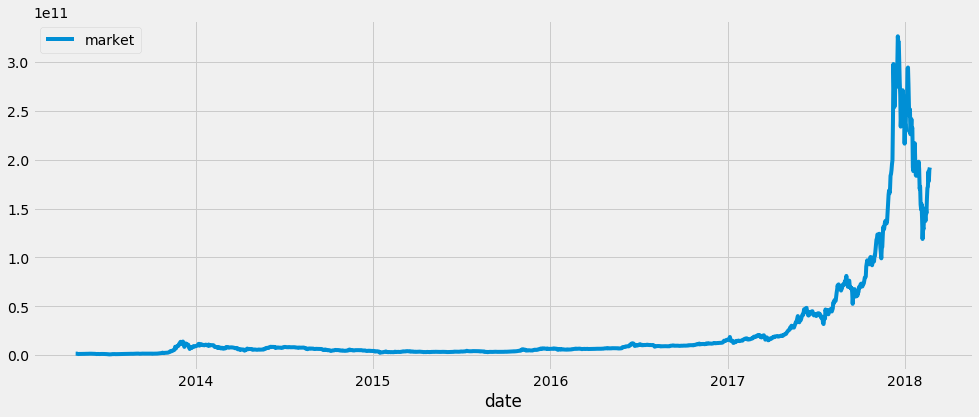

In [12]:
# y = datasetBitcoinIndexedMarket.values
datasetBitcoinIndexedMarket.plot(figsize=(15, 6))
plt.show()
# datasetBitcoinIndexedMarket.values

In [13]:
datasetBitcoinIndexedMarket['2018':].head()

,market
date,
2018-01-01,236725000000
2018-01-02,228579000000
2018-01-03,251312000000
2018-01-04,256250000000
2018-01-05,259748000000


In [14]:
datasetBitcoinMarket = datasetBitcoinIndexedMarket.reset_index()
datasetBitcoinMarket

,date,market
0,2013-04-28,1500520000
1,2013-04-29,1491160000
2,2013-04-30,1597780000
3,2013-05-01,1542820000
4,2013-05-02,1292190000
5,2013-05-03,1180070000
6,2013-05-04,1089890000
7,2013-05-05,1254760000
8,2013-05-06,1289470000
9,2013-05-07,1248470000


/Users/jatintaneja/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


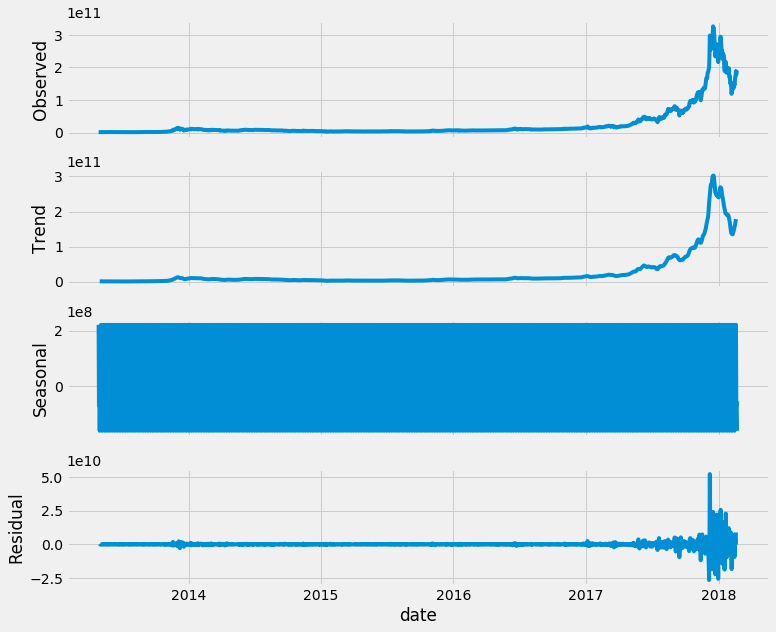

In [15]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(datasetBitcoinIndexedMarket, model='additive')
fig = decomposition.plot()
plt.show()

# ARIMA Time series

In [21]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [27]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
minAIC = 0
minParam = (0,0,0)
minParamSeasonal = (0, 0, 0, 12)
firstTime=True
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(datasetBitcoinIndexedMarket,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            if firstTime:
                minAIC = results.aic
                firstTime = False
            else:
                if results.aic < minAIC:
                    print('results.aic is ' , results.aic )
                    print('minAIC is ' , minAIC)
                    minAIC = results.aic
                    minParam = param;
                    minParamSeasonal = param_seasonal
        except:
            print('Exception occurred')
            continue

Exception occurred
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:90303.77105024995
Exception occurred
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:86118.24954961147
results.aic is  86118.2495496
minAIC is  90303.7710502
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:86756.49987104828
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:86702.5737510322
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:86165.42810712017
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:86115.55779874024
results.aic is  86115.5577987
minAIC is  86118.2495496
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:238366034616.9432
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:110563946447.31659
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:85312.87599490682
results.aic is  85312.8759949
minAIC is  86115.5577987
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:84732.67298249897
results.aic is  84732.6729825
minAIC is  85312.8759949
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:167213589375.2921
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:148329002707.2963
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:84829.13025875128
ARIMA(0, 0, 1)x(1, 1, 1, 12

In [29]:
print(minAIC)
print(minParam)
print(minParamSeasonal)

81596.5241824
(0, 1, 0)
(1, 1, 1, 12)


In [47]:
modifier = sm.tsa.statespace.SARIMAX(datasetBitcoinIndexedMarket,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

predictions = modifier.fit()

print(predictions.summary())

                                 Statespace Model Results                                 
Dep. Variable:                             market   No. Observations:                 1761
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood              -40795.262
Date:                            Thu, 29 Mar 2018   AIC                          81596.524
Time:                                    01:41:29   BIC                          81612.945
Sample:                                04-28-2013   HQIC                         81602.592
                                     - 02-21-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1050      0.010    -10.448      0.000      -0.125      -0.085
ma.S.L12      -1.0007      0.003   

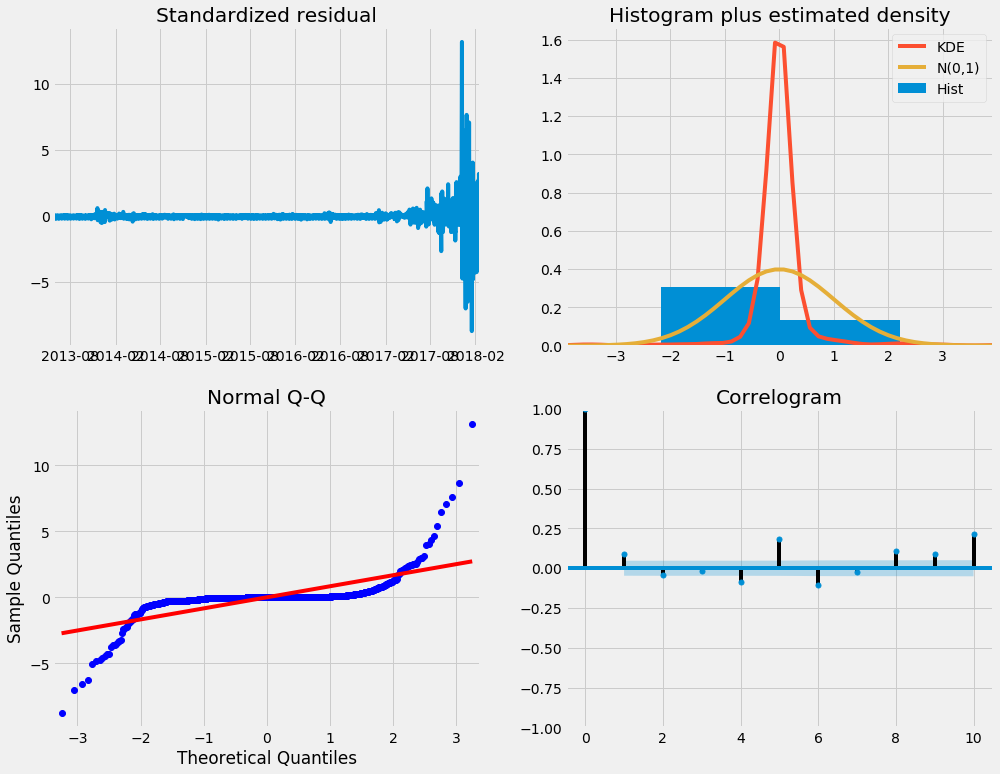

In [46]:
predictions.plot_diagnostics(figsize=(15, 12))
plt.show()

In [49]:
pred = predictions.get_prediction(start=pd.to_datetime('2013-04-28'), dynamic=False)
pred_ci = pred.conf_int()